In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Czyszczenie danych

In [38]:
data = df[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App']).max().dropna().reset_index()
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
data["Reviews"] = pd.to_numeric(data["Reviews"])
data = data[data["Type"] == "Free"]
mydata = data[["Category", "Rating", "Reviews", "Installs"]]
mydata

<ipython-input-38-7fff421c9af9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))


,Category,Rating,Reviews,Installs
0,SOCIAL,4.5,40467,1000000
1,COMICS,3.5,115,10000
2,TOOLS,4.5,259,10000
3,COMMUNICATION,4.7,573,10000
4,NEWS_AND_MAGAZINES,4.4,27,100
...,...,...,...,...
8190,FAMILY,4.3,55408,1000000
8191,COMICS,4.4,190,10000
8193,SOCIAL,4.6,22098,1000000
8194,TOOLS,4.0,19,10000


spradzenie typu danych (liczbowe / tekstowe)

In [4]:
mydata.dtypes

Category     object
Rating      float64
Reviews       int64
Installs      int64
dtype: object

TOP 10 kategorii według 'Rating'

In [5]:
cat_rating = mydata[["Category","Rating"]].groupby("Category").describe().reset_index()
cat_rating.columns = cat_rating.columns.droplevel()
cat_rating = cat_rating.sort_values("count", ascending=False)
cat_rating.iloc[:10,:4]

,,count,mean,std
11,FAMILY,1648.0,4.183010,0.519191
14,GAME,911.0,4.246981,0.384149
29,TOOLS,720.0,4.040833,0.619973
12,FINANCE,302.0,4.115563,0.659147
18,LIFESTYLE,301.0,4.093355,0.704951
25,PRODUCTIVITY,301.0,4.183389,0.534281
23,PERSONALIZATION,298.0,4.332215,0.358968
20,MEDICAL,291.0,4.170103,0.691101
24,PHOTOGRAPHY,263.0,4.157414,0.494331
4,BUSINESS,262.0,4.096565,0.660393


TOP 10 kategorii według 'Reviews'

In [6]:
cat_reviews = mydata[["Category","Reviews"]].groupby("Category").describe().reset_index()
cat_reviews.columns = cat_reviews.columns.droplevel()
cat_reviews = cat_reviews.sort_values("count", ascending=False)
cat_reviews.iloc[:10,:4]

,,count,mean,std
11,FAMILY,1648.0,104095.245752,4.952378e+05
14,GAME,911.0,656509.698134,2.505477e+06
29,TOOLS,720.0,318652.834722,2.192072e+06
12,FINANCE,302.0,41929.307947,1.465868e+05
18,LIFESTYLE,301.0,39307.897010,1.999991e+05
25,PRODUCTIVITY,301.0,184686.372093,5.565593e+05
23,PERSONALIZATION,298.0,179673.798658,8.358976e+05
20,MEDICAL,291.0,5183.522337,2.457690e+04
24,PHOTOGRAPHY,263.0,400579.171103,1.181882e+06
4,BUSINESS,262.0,37029.450382,1.563544e+05


TOP 10 kategorii według 'Installs' - sortowane po ilości

In [7]:
cat_installs = mydata[["Category","Installs"]].groupby("Category").describe().reset_index()
cat_installs.columns = cat_installs.columns.droplevel()
cat_installs = cat_installs.sort_values("count", ascending=False)
cat_installs.iloc[:10,:4]

,,count,mean,std
11,FAMILY,1648.0,3.640462e+06,2.685986e+07
14,GAME,911.0,1.509754e+07,5.242133e+07
29,TOOLS,720.0,1.124963e+07,5.844248e+07
12,FINANCE,302.0,1.507657e+06,6.746466e+06
18,LIFESTYLE,301.0,1.673559e+06,6.887409e+06
25,PRODUCTIVITY,301.0,1.922947e+07,8.347472e+07
23,PERSONALIZATION,298.0,5.142124e+06,1.725180e+07
20,MEDICAL,291.0,1.658164e+05,7.462436e+05
24,PHOTOGRAPHY,263.0,1.771157e+07,6.650775e+07
4,BUSINESS,262.0,2.641291e+06,1.113458e+07


TOP 10 kategorii według 'Installs' - sortowane po średniej

In [8]:
cat_installs = mydata[["Category","Installs"]].groupby("Category").describe().reset_index()
cat_installs.columns = cat_installs.columns.droplevel()
cat_installs = cat_installs.sort_values("mean", ascending=False)
cat_installs.iloc[:10,:4]

,,count,mean,std
6,COMMUNICATION,257.0,4.296981e+07,1.648614e+08
27,SOCIAL,203.0,2.703370e+07,1.306430e+08
31,VIDEO_PLAYERS,149.0,2.638790e+07,1.228616e+08
25,PRODUCTIVITY,301.0,1.922947e+07,8.347472e+07
24,PHOTOGRAPHY,263.0,1.771157e+07,6.650775e+07
30,TRAVEL_AND_LOCAL,187.0,1.548053e+07,1.036479e+08
14,GAME,911.0,1.509754e+07,5.242133e+07
21,NEWS_AND_MAGAZINES,204.0,1.161329e+07,8.530908e+07
29,TOOLS,720.0,1.124963e+07,5.844248e+07
3,BOOKS_AND_REFERENCE,169.0,9.856755e+06,7.813792e+07


TOP 10 aplikacji według 'Installs' i 'Reviews'

In [39]:
d = data.sort_values(["Installs","Reviews"], ascending=False).iloc[:10]
d = d.groupby(["Category"]).count().reset_index()
d.iloc[:,:2].sort_values(["App"], ascending=False)

,Category,App
0,COMMUNICATION,4
3,SOCIAL,2
1,GAME,1
2,PHOTOGRAPHY,1
4,TRAVEL_AND_LOCAL,1
5,VIDEO_PLAYERS,1


In [40]:
d = data.sort_values(["Installs","Reviews"], ascending=False).iloc[:100]
d = d.groupby(["Category"]).count().reset_index()
d.iloc[:,:2].sort_values(["App"], ascending=False)

,Category,App
3,GAME,29
1,COMMUNICATION,15
13,TOOLS,13
11,SOCIAL,7
9,PRODUCTIVITY,6
8,PHOTOGRAPHY,5
2,FAMILY,4
7,PERSONALIZATION,4
15,VIDEO_PLAYERS,4
6,NEWS_AND_MAGAZINES,3


In [46]:
d = data.sort_values(["Installs","Reviews"], ascending=False)
d

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
3432,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,Teen
7665,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,Everyone
4422,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,Teen
5096,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,Everyone
6807,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,Everyone 10+
...,...,...,...,...,...,...,...,...
2088,Clinic Doctor EHr,MEDICAL,5.0,2,7.1M,5,Free,Everyone
3375,FK Atlantas,SPORTS,1.5,2,26M,5,Free,Everyone
578,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6M,5,Free,Everyone
2881,EB Cash Collections,BUSINESS,5.0,1,4.3M,5,Free,Everyone


In [69]:
q = .8
pop = d[d["Installs"] > d["Installs"].quantile(q)]
pop = pop[pop["Reviews"] > pop["Reviews"].quantile(q)]
pop.sort_values(["Installs","Reviews"], ascending=False)

d = pop.sort_values(["Installs","Reviews"], ascending=False)
d = d.groupby(["Category"]).count().reset_index()
d.iloc[:,:2].sort_values(["App"], ascending=False)

,Category,App
5,GAME,93
3,FAMILY,31
1,COMMUNICATION,27
16,TOOLS,22
11,PHOTOGRAPHY,20
14,SOCIAL,13
12,PRODUCTIVITY,13
15,SPORTS,9
10,PERSONALIZATION,8
13,SHOPPING,8


In [70]:
d = pop.sort_values(["Installs","Reviews"], ascending=False)
d = d.groupby(["Content Rating"]).count().reset_index()
d.iloc[:,:2].sort_values(["App"], ascending=False)

,Content Rating,App
0,Everyone,176
3,Teen,64
1,Everyone 10+,20
2,Mature 17+,14


In [77]:
d = pop.sort_values(["Installs","Reviews"], ascending=False)
d = d.groupby(["Rating"]).count().reset_index()
d.iloc[:,:2].sort_values(["App"], ascending=False)

,Rating,App
7,4.4,66
8,4.5,61
9,4.6,52
6,4.3,48
5,4.2,16
10,4.7,15
4,4.1,5
3,4.0,4
11,4.8,4
0,3.7,1


In [76]:
d = pop.sort_values(["Installs","Reviews"], ascending=False)
d = d.groupby(["Rating"]).count().reset_index()
d["Rating"].describe()

count    12.000000
mean      4.250000
std       0.360555
min       3.700000
25%       3.975000
50%       4.250000
75%       4.525000
max       4.800000
Name: Rating, dtype: float64

TOP 10 aplikacji według 'Installs' i 'Reviews' z filtrowaniem do wybranej kategorii

In [10]:
data[data["Category"] == "FAMILY"].sort_values(["Installs","Reviews"], ascending=False).iloc[:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
4009,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,Teen
4177,Hay Day,FAMILY,4.5,10053186,94M,100000000,Free,Everyone
2861,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,100000000,Free,Everyone
5453,Netflix,FAMILY,4.4,5456708,Varies with device,100000000,Free,Teen
6974,Talking Tom Cat 2,FAMILY,4.3,3213548,55M,100000000,Free,Everyone 10+
1466,Bubble Witch 2 Saga,FAMILY,4.3,2838064,Varies with device,100000000,Free,Everyone
1307,Bitmoji – Your Personal Emoji,FAMILY,4.6,2312084,Varies with device,100000000,Free,Teen
6973,Talking Tom Cat,FAMILY,4.3,1838090,Varies with device,100000000,Free,Everyone 10+
6967,Talking Ginger,FAMILY,4.2,1752017,52M,100000000,Free,Everyone
6965,Talking Ben the Dog,FAMILY,4.3,1633682,57M,100000000,Free,Everyone


In [ ]:
data["App"].sort_values(["Installs","Reviews"], ascending=False).iloc[:10]

In [ ]:
sorted_cat_list = list(cat_reviews.sort_values("mean", ascending=False)[""])
print(sorted_cat_list)

['SOCIAL', 'COMMUNICATION', 'GAME', 'VIDEO_PLAYERS', 'PHOTOGRAPHY', 'TOOLS', 'SHOPPING', 'SPORTS', 'ENTERTAINMENT', 'PRODUCTIVITY', 'PERSONALIZATION', 'WEATHER', 'MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL', 'NEWS_AND_MAGAZINES', 'FAMILY', 'BOOKS_AND_REFERENCE', 'HEALTH_AND_FITNESS', 'FOOD_AND_DRINK', 'EDUCATION', 'COMICS', 'FINANCE', 'LIFESTYLE', 'BUSINESS', 'HOUSE_AND_HOME', 'DATING', 'ART_AND_DESIGN', 'PARENTING', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'BEAUTY', 'MEDICAL', 'EVENTS']


<ipython-input-289-5a4cfb2c7bfc>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
<ipython-input-289-5a4cfb2c7bfc>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,2)
<ipython-input-289-5a4cfb2c7bfc>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

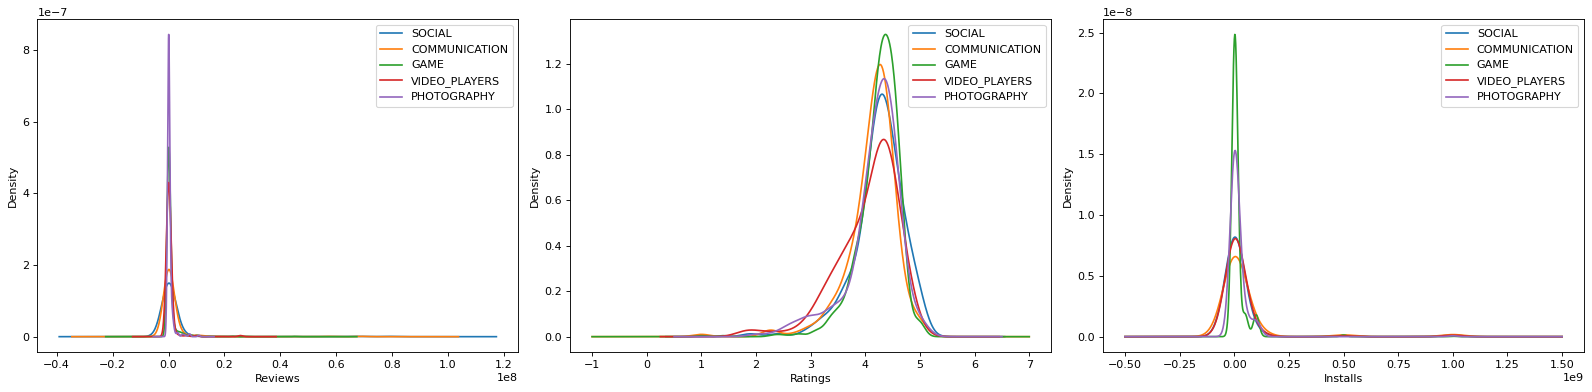

In [ ]:
i = 0
top = 5
top_cat_list = sorted_cat_list[:top]
plt.figure(figsize=(20,5), dpi = 80)

while i < top:
    
    plt.subplot(1,3,1)
    reviews = mydata[mydata["Category"] == top_cat_list[i]]["Reviews"]
    reviews.plot.density()
    plt.legend(top_cat_list)
    plt.xlabel("Reviews")

    plt.subplot(1,3,2)
    ratings = mydata[mydata["Category"] == top_cat_list[i]]["Rating"]
    ratings.plot.density()
    plt.legend(top_cat_list)
    plt.xlabel("Ratings")

    plt.subplot(1,3,3)
    installs = mydata[mydata["Category"] == top_cat_list[i]]["Installs"]
    installs.plot.density()
    plt.legend(top_cat_list)
    plt.xlabel("Installs")
    plt.tight_layout()

    i += 1

In [ ]:
i = 0
top = 5
top_top = 10
top_cat_list = sorted_cat_list[:top]
plt.figure(figsize=(20,5), dpi = 80)

   
data[data["Category"] == top_cat_list[i]].sort_values("Reviews", ascending=False)


,Category,Rating,Reviews,Size,Installs,Type,Content Rating
App,,,,,,,
Phoenix - Facebook & Messenger,SOCIAL,4.3,9606,3.4M,100000,Free,Teen
Swift for Facebook Lite,SOCIAL,4.3,9562,5.8M,500000,Free,Teen
Best DP and Status,SOCIAL,4.2,93,5.6M,10000,Free,Teen
VMate Lite - Funny Short Videos Social Network,SOCIAL,4.3,903,4.6M,1000000,Free,Teen
FollowMeter for Instagram,SOCIAL,4.4,90082,8.8M,1000000,Free,Everyone
...,...,...,...,...,...,...,...
BGKontakti Vienna BG Kontakti,SOCIAL,4.8,111,5.9M,1000,Free,Everyone
Stickers for Facebook,SOCIAL,4.3,11066,10M,1000000,Free,Everyone
Lite Messenger for Facebook Lite,SOCIAL,3.8,108,2.8M,10000,Free,Teen


<Figure size 1600x400 with 0 Axes>